In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import time
from tracker_log_analysis import *

In [5]:
def DOA_to_ElAz(df):
    """
    Calculate elevation and azimuth angles from DOA vectors in a pandas DataFrame.

    Parameters:
    df (pandas.DataFrame): DataFrame containing 'DOA_x', 'DOA_y', 'DOA_z' columns.

    Returns:
    pandas.DataFrame: The original DataFrame with added 'El.' and 'Az.' columns.
    """
    # Ensure the DOA components are present in the DataFrame
    required_columns = {'DOA_x', 'DOA_y', 'DOA_z'}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"DataFrame must contain the columns: {required_columns}")

    # Calculate elevation angle (El.)
    df['El.'] = 180.0 - np.degrees(np.arccos(df['DOA_z']))
    # Calculate azimuth angle (Az.)
    df['Az.'] = np.degrees(np.arctan2(df['DOA_y'], df['DOA_x']))

    # Optional: Ensure azimuth values are within [0, 360) degrees
    #df['Az.'] = df['Az.'] % 360

    return df

Datetime object:  2023-11-05 09:01:01+00:00
Unix time in microseconds:  1699174861000000
here1:  1699174861000000
here2:  1699174862111040
Plot saved to 231105_090101_000000_132_raw.png


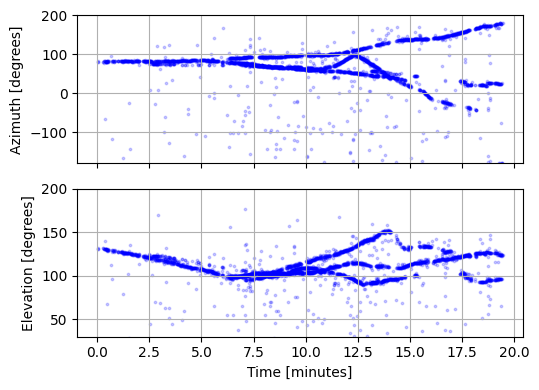

In [ ]:
# Define the column names
"""
column_names = ["usec_since_Unix_Start", "Energy", "El.", "Az.", "TDOA12", "TDOA13", "TDOA14", 
                "TDOA23", "TDOA24", "TDOA34", "Xcorr12", "Xcorr13", "Xcorr14", 
                "Xcorr23", "Xcorr24", "Xcorr34"]
"""
column_names = [
    "PeakTime", "Amplitude", "DOA_x", "DOA_y", "DOA_z", "TDOA12", "TDOA13", "TDOA14",
    "TDOA23", "TDOA24", "TDOA34", "Xcorr12", "Xcorr13", "Xcorr14",
    "Xcorr23", "Xcorr24", "Xcorr34"
]
# Load the data with the specified column names
path_doa = "../../listener_program/deployment_files/231105_090101_000000"
path_doa = "../listener_program/tracks/231105_090101_000000_132"

#df = pd.read_csv(path_doa, delim_whitespace=True, names=column_names, skiprows=1)
df = pd.read_csv(path_doa, sep=',', names=column_names, skiprows=1)
df = DOA_to_ElAz(df)

startTime = convertToStamp(path_doa)
print("here1: ",startTime)
print("here2: ",df["PeakTime"][0])

df["TimeMinutes"] = (df["PeakTime"] - startTime) / (1000000 * 60)
# Display the first few rows to verify
#print(df.head())

# Create a figure with two subplots (one for Azimuth vs. Time, one for Elevation vs. Time)
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)

# Plot Azimuth vs. Time with transparency on the first subplot
azData = df["Az."]
elData = df["El."]

# Create a figure with two subplots (one for Azimuth vs. Time, one for Elevation vs. Time)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 4), sharex=True)

# Plot Azimuth vs. Time with transparency on the first subplot
ax1.scatter(df["TimeMinutes"], azData, marker='o', s=3, color='b', alpha=0.2)
ax1.set_ylabel("Azimuth [degrees]")
ax1.set_ylim(-180, 200)
ax1.grid(True)

# Plot Elevation vs. Time with transparency on the second subplot
ax2.scatter(df["TimeMinutes"], elData, marker='o', s=3, color='b', alpha=0.2)
ax2.set_xlabel("Time [minutes]")
ax2.set_ylabel("Elevation [degrees]")
ax2.set_ylim(30, 200)
ax2.grid(True)

# Adjust the layout to ensure no overlapping and display the plot
plt.tight_layout()

# Extract the base path from the file path and create the output file path
base_path = os.path.splitext(path_doa.split('/')[-1])[0]  # Remove file extension
output_path = base_path + "_raw.png"  # Append desired file name extension

# Save the figure to the output path
plt.savefig(output_path, dpi=300)
print(f"Plot saved to {output_path}")
plt.show()